# MATH7002 Advanced Statistical methods
## Worksheet 9

## Binomial Proportion

|Log Dose|  0|  1|  2|  3|  4|  5|
|--:|--:|--:|--:|--:|--:|--:|
|Num Dead|  1|  4|  9| 13| 18| 20|

1. The table above shows the number of tobacco budworms killed out of 20 at a given log dose of insecticide.


a. Assuming a *uniform prior* compute the MAP estimate of the proportion killed, separately for each dose. (Recall that the uniform distribution is a Beta(1,1).)

In [1]:
numd = c(1,4,9,13,18,20)

In [2]:
# For Beta function, it contains two parameters a, b, Beta(a,b)
a = 1 
b = 1 
n = 20 # Because the total number of budworms is 20 
map.beta = function(y){
    post.a = a + y
    post.b = b + n - y
    (post.a - 1)/(post.a + post.b -2) # This is because of the MAP formulation of binomial distribution 
}

In [6]:
sapply(numd, map.beta)

[1] 0.05 0.20 0.45 0.65 0.90 1.00

    b. Using the same prior as a. compute a 95% equal-tailed credible interval for the proportion killed, separately for each dose. What do you notice about log-dose=5?

In [10]:
# This question askes us to calculate the credible interval for our estimation 
# qbeta
cred.beta = function(y){
    # Because of the definition of Beta distibution, if you forget it, go back to Page 36. 
    post.a = a + y 
    post.b = b + n -y 
    # Here we want to find the credible interval (2.5%, 97.5%) of our confident interval 
    # That means we want to find the (2.5%, 97.5%) confident interval of the beta distibution when a = 1, b =1
    qbeta(c(0.025, 0.975), post.a, post.b)
} 

In [11]:
sapply(numd, cred.beta)
# How to interprete the output of the map.beta? For example, if your input is x, your output is y.
# So y is the probability of the case when the total number of died budworms is x! 
# And the corresponding credible interval works as the confident interval of this estimation, y! 

0.01174932,0.08217588,0.2571306,0.4303245,0.6962256,0.8389024
0.23815991,0.41906604,0.6597937,0.8189284,0.9695110,0.9987951


In [12]:
# If you calculate the length of the log-dose = 5, 
0.998 - 0.838 

[1] 0.16

In [13]:
# Log-dose = 2 
0.419 - 0.08 
# Large credible interval means more uncertainty, or large variance. 

[1] 0.339

    c. Assuming a Beta(6,5) prior compute the MAP estimate of the proportion killed, separately for each dose.

In [14]:
# Here the prior change to Beta(6,5), that means a = 6, and b = 5 now! 
a = 6 
b = 5
sapply(numd, map.beta)

[1] 0.2068966 0.3103448 0.4827586 0.6206897 0.7931034 0.8620690

In [15]:
sapply(numd, cred.beta)

0.09933786,0.1728742,0.3129703,0.4385598,0.6143335,0.6927816
0.38566651,0.4939590,0.6567448,0.7734424,0.9006621,0.9435783


In [16]:
# For beta(6,5), you can find the credible interval of log-dose = 0 is (0.099, 0.385)
# For beta(1,1), you can find the credible interval of log-dose = 0 is (0.01174932, 0.238)
# Observation is: for beta(6,5), both the minimum and maximum value of the credible interval increase ! 
# For beta(6,5), you can find the credible interval of log-dose = 5 is (0.6927816, 0.9435783)
# For beta(1,1), you can find the credible interval of log-dose = 5 is (0.83, 0.99)
# Observation is: for beta(6,5), both the minimum and maximum value of the credible interval decrease ! 
# Conclusion is: if we change the prior distribution, the extreme inputs will yield a milder estimation. 
# This is because of the physical meansing of Beta(1,1) and Beta(6,5). 
# For beta(1,1), it is a uniform distribution that means every inputs are all the same. 
# For beta(6,5), we believe the value of $\theta$, the survivial probability of budwormds, should around 0.5. 
# The prior distribution favours value around 0.5, meaning the survival rate is more likely to be around 0.5!

    d. Using the same prior as c. compute a 95% equal-tailed credible interval for the proportion killed, separately for each dose. What do you notice *now* about log-dose=5?

In [19]:
set.seed(7763) 
# This one is used to generate a mean with 2 deicmals from a normal distribution given mu =25 and sd = 5! 
samp1 = function(n) round(mean(rnorm(n, 25, 5)),2)

## Normal Mean 

2. Assume a data set that is Normally distributed with mean $\mu$ and known standard deviation $\sigma=5$. Assume further a prior for $\mu$ which is Normal with mean $\nu=20$ and standard deviation  $\tau=10$. Compute the MAP estimate and a 95% equal-tailed credible interval for the mean $\mu$ using the following data.

a. $n=10, \bar{x} = `r samp1(10)`$

In [20]:
s = 5 
nu = 20 
tau = 10

In [21]:
# Transform the formulation on Page 56 into R code 
do.norm = function(n, xbar){
    # Variance
    post.var = 1/(n/s^2 + 1/tau^2)
    # Mean 
    post.mean = (n*xbar/s^2 + nu/tau^2) * post.var
    cat("Map estimation = ", post.mean, "\n")
    cat("Credible Interval = ", qnorm(c(0.025, 0.975), post.mean, sqrt(post.var)), "\n")
}

In [22]:
xbar1 = samp1(10)

In [24]:
do.norm(10,xbar1)

Map estimation =  21.64878 
Credible Interval =  18.58783 24.70973 


b. $n=20, \bar{x} = `r samp1(20)`$

In [25]:
do.norm(20,samp1(20))

Map estimation =  25.24444 
Credible Interval =  23.06671 27.42218 


c. $n=50, \bar{x} = `r samp1(50)`$    

In [26]:
do.norm(50,samp1(50))

Map estimation =  24.23881 
Credible Interval =  22.85635 25.62126 


In [27]:
# This is another important property of Bayesian Inference ! 
# If you increase the size of your datasets, in other words, we have more information! 
# Out MAP estimation should be more accurate! 

3. Repeat the above but with prior standard deviation $\tau=2$

In [28]:
tau = 2
do.norm(10, samp1(10))

Map estimation =  23.21231 
Credible Interval =  20.78127 25.64334 


## Poisson mean

4. Another example of a conjugate prior is in the case of a Poisson mean with a Gamma prior. In this case
\begin{align*}
(Prior)p(\lambda) &= \frac{1}{\theta^k\Gamma(k)} \lambda^{k-1} e^{-\lambda/\theta}\\
(Likelihood)p(y\vert \lambda) &= \frac{\lambda^y}{y!} e^{-\lambda}\\
\text{Therefore}\quad (Posterior distribution) \quad p(\lambda\vert y) &\propto \lambda^{k+y-1} e^{-(1+1/\theta)\lambda}
\end{align*}
Where $y$ is a single observation from a Poisson distribution with mean $\lambda$  
Assume that $k=2$ and $\theta=10$.

    a. Plot the prior density.

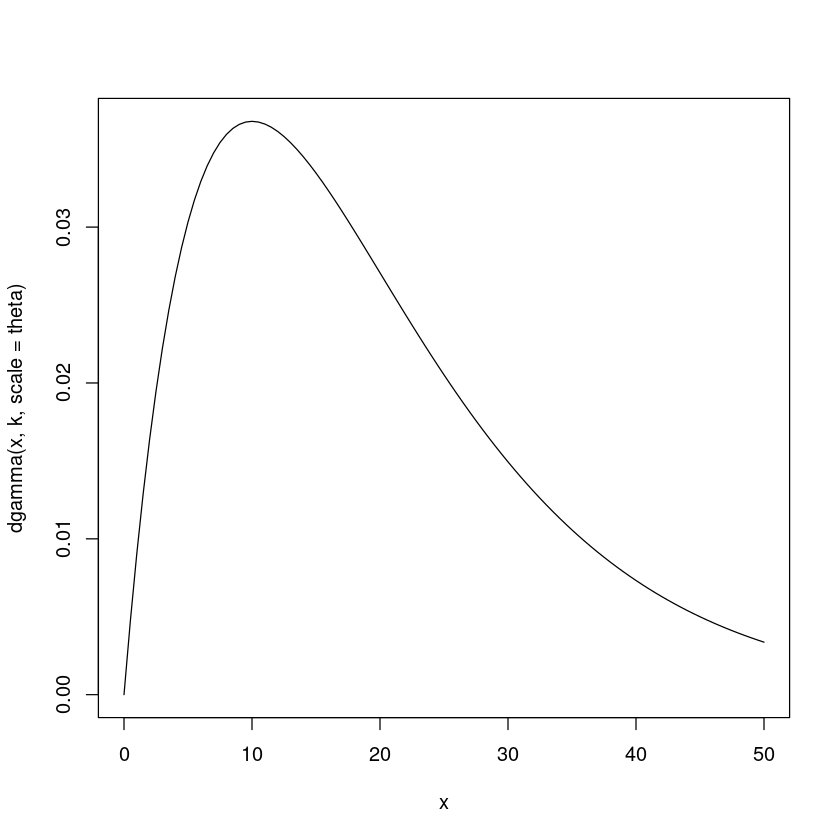

In [29]:
k = 2
theta = 10
curve(dgamma(x, k, scale = theta), from = 0, to = 50)

    b. If $y=25$ is observed, plot the posterior.

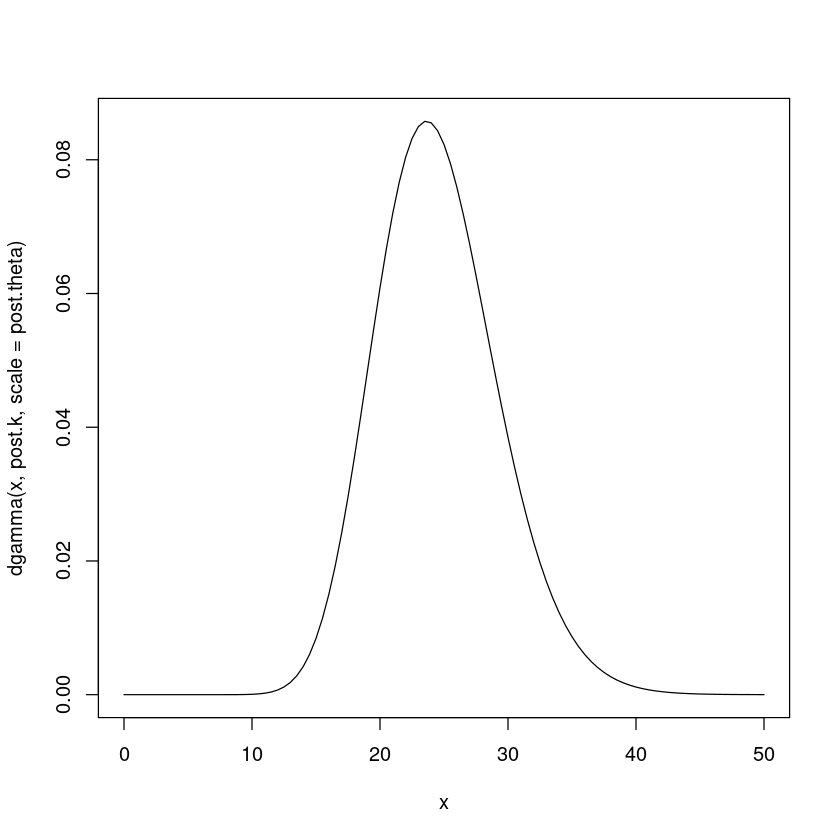

In [30]:
# Posterior is Gamma distribution 
y = 25
# update k and theta for the Gamma distribution!
post.k = k + y
post.theta = 1/(1 + 1/theta)
curve(dgamma(x, post.k, scale = post.theta), from = 0, to = 50)

    c. In the case of b., compute the MAP estimate of $\lambda$    

In [31]:
# By taking MLE ! 
a = k + y 
b = theta / (theta + 1)

In [32]:
lambda = (a-1)*b

In [33]:
lambda

[1] 23.63636